<a href="https://colab.research.google.com/github/Harshobhit/Hands-On_Recurrent-Neural-Networks/blob/main/Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [4]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

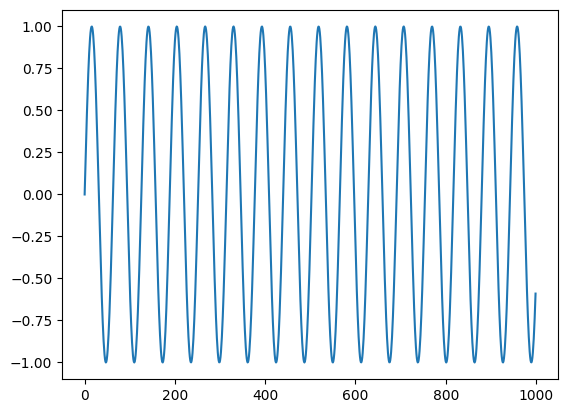

In [5]:
# make the original data
series = np.sin(0.1*np.arange(1000)) #+ np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [6]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [9]:
X[0]

array([[0.        ],
       [0.09983342],
       [0.19866933],
       [0.29552021],
       [0.38941834],
       [0.47942554],
       [0.56464247],
       [0.64421769],
       [0.71735609],
       [0.78332691]])

In [10]:
### trying autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.001),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
16/16 [==============================] - 4s 25ms/step - loss: 0.7356 - val_loss: 0.5466
Epoch 2/80
16/16 [==============================] - 0s 6ms/step - loss: 0.4163 - val_loss: 0.3004
Epoch 3/80
16/16 [==============================] - 0s 8ms/step - loss: 0.2407 - val_loss: 0.1931
Epoch 4/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1557 - val_loss: 0.1213
Epoch 5/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0953 - val_loss: 0.0675
Epoch 6/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0490 - val_loss: 0.0310
Epoch 7/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0234 - val_loss: 0.0145
Epoch 8/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0114 - val_loss: 0.0086
Epoch 9/80
16/16 [==============================] - 0s 9ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 10/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 11/80
16/16 

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 15)                255       
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 23ms/step


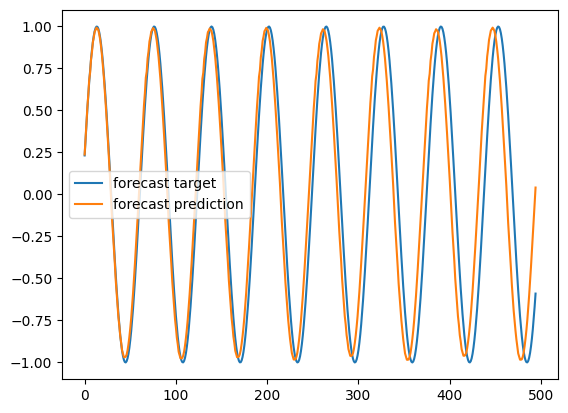

In [13]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()